<a href="https://colab.research.google.com/github/R12942159/NTU_DLCV/blob/Hw3/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

In [63]:
import os
import json
import clip
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from google.colab import drive

#### Get cuda from GPU device.

In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using: {device}")

Using: cpu


#### Connect google drive

In [1]:
drive.mount('/content/drive')

Mounted at /content/drive


#### Download dataset and unzip zip file.

In [ ]:
!gdown 11rP6KmR5Qwjhx0rfag0b5TZGBTRuPtQR -O hw3_data.zip
!unzip /content/hw3_data.zip

#### Construct image path

In [104]:
val_path = '/content/hw3_data/p1_data/val'
id2label_path = '/content/hw3_data/p1_data/id2label.json'

img_paths = [os.path.join(val_path, i) for i in os.listdir(val_path) if i.endswith('.png')]
id2label = json.load(open(id2label_path, 'r'))
labels = [l for _, l in id2label.items()]

#### Understand the image size and specifications

This is the image of 2139, it is a dolphin.


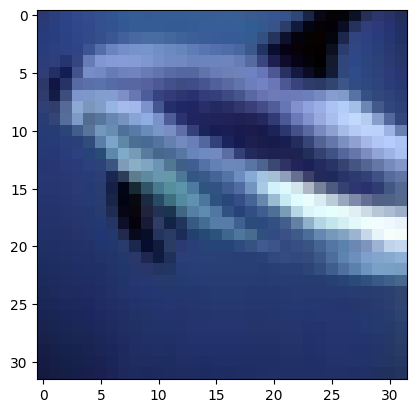

In [102]:
rd_int = random.randint(0, 2499)
class_num = img_paths[rd_int].split('/')[-1].split('_')[0]
print(f'This is the image of {rd_int}, it is a {id2label[class_num]}.')

img = Image.open(img_paths[rd_int]).convert('RGB')
img = np.array(img)
img.shape

IMG_SIZE = img.shape[1]

plt.imshow(img)
plt.show()

#### Training with ["RN50", "RN101", "RN50x4", "RN50x16", "RN50x64", "ViT-B/32", "ViT-B/16", "ViT-L/14", "ViT-L/14@336px"]

In [ ]:
def train():
    model, transform = clip.load(name="RN50x64", device=device, jit=False, download_root=None)

    for path in tqdm(img_paths):
        img = Image.open(path).convert('RGB')
        img = transform(img).to(device)
        prompt_text = torch.cat(
            [clip.tokenize(f'A photo of a {i}', context_length=77, truncate=False) for i in labels]
        ).to(device)

        with torch.no_grad():
            img_features = model.encode_image(img)
            text_features = model.encode_text(prompt_text)